<a href="https://colab.research.google.com/github/EmmanueleVilla/quantum_computing/blob/main/Colab_18_L'algoritmo_di_Grover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install qiskit --quiet && pip install pylatexenc --quiet && pip install qiskit-aer --quiet

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 42.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 87.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 27.1 MB/s eta 0:00:00


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumCircuit, Aer, transpile, execute, assemble, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.visualization.state_visualization import array_to_latex
from math import gcd
from numpy.random import randint
import pandas as pd
from fractions import Fraction
from qiskit.circuit.library import QFT

In [4]:
def get_state(circuit):
  state_vector_simulator = Aer.get_backend("statevector_simulator")
  job = execute(circuit, backend=state_vector_simulator)
  result = job.result()
  return result.get_statevector()

## Algo di Grover con 2 qubit per ricerca di |11>

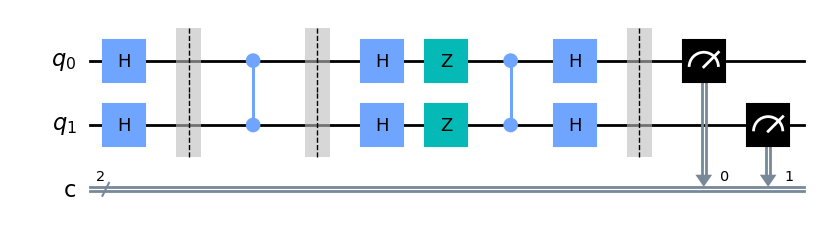

In [32]:
qc = QuantumCircuit(2, 2)

# Preparazione
qc.h(range(2))
qc.barrier()

# Oracolo
qc.cz(0,1)
qc.barrier()

qc.h(range(2))
qc.z(range(2))
qc.cz(0,1)
qc.h(range(2))
qc.barrier()
qc.measure([0,1],[0,1])
qc.draw(output="mpl")

In [33]:
array_to_latex(get_state(qc))

<IPython.core.display.Latex object>

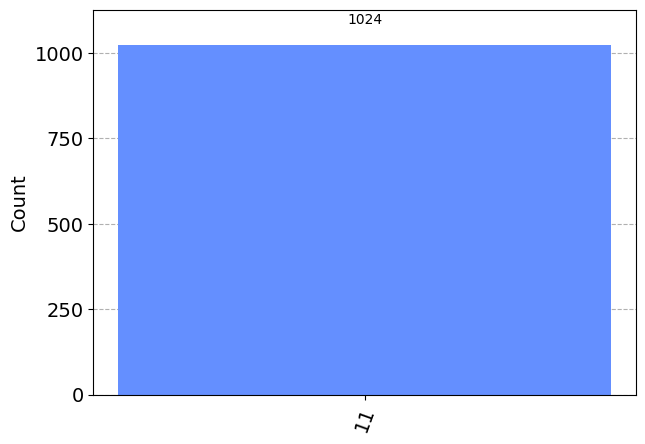

In [34]:
simulator = Aer.get_backend("aer_simulator")
result = simulator.run(qc).result()
counts = result.get_counts()
plot_histogram(counts)

## Algo di Grover con 3 qubit che cerca |101> e |110>

In [35]:
def init(qc, n):
  qc.h(range(n))
  qc.barrier()
  return qc

In [36]:
def oracle(qc):
  qc.cz(0,2)
  qc.cz(1,2)
  qc.barrier()
  return qc

In [40]:
def diffuser(qc, n):
  # rifaccio inizializzazione
  qc.h(range(n))

  # inverto l'input
  qc.x(range(n))

  # controlled not MA con tutti i qubit-1 come controllore
  qc.h(n-1)
  qc.mct(list(range(n-1)), n-1)
  qc.h(n-1)

  qc.barrier(range(2))

  # inverto l'inversione dell'input
  qc.x(range(n))

  #inverto l'inizializzazione dell'input
  qc.h(range(n))

  return qc

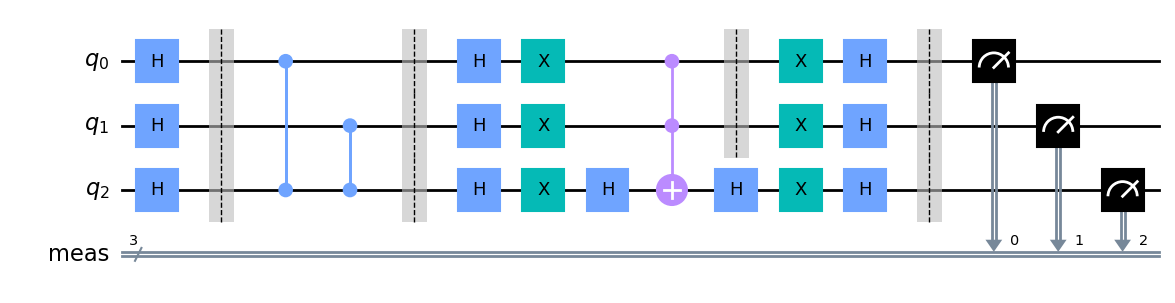

In [41]:
qc = QuantumCircuit(3)
qc = init(qc, 3)
qc = oracle(qc)
qc = diffuser(qc, 3)
qc.measure_all()
qc.draw(output="mpl")

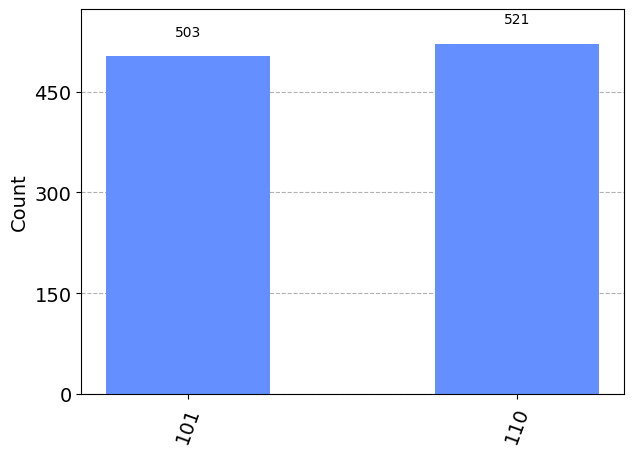

In [42]:
simulator = Aer.get_backend("aer_simulator")
result = simulator.run(qc).result()
counts = result.get_counts()
plot_histogram(counts)